# Audio files manipulation and feature extraction

The first challenge I had to deal with was figuring out what to do with an audio file. This is not our traditional dataset and. At first, We really have no features no work with.

So the first step is doing some analysis on a sample audio file, visualizing it and exploring possible features we could extract from it. The decided features will later be extracted from all files and saved in a data frame or numpy array we will use to train our model/models.

The main library I will use for exploration is **librosa**, a python package for music and audio analysis.

In [10]:
#Import libraries:
import librosa
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import tqdm as tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Path to sample audio file:

audio_path='./Data/genres/reggae/reggae.00001.wav'

In [8]:
#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono:

x , sr = librosa.load(audio_path, duration=15)
x1, sr1=librosa.load(audio_path)
x2 , sr2 = librosa.load(audio_path, offset=15)
print(x.shape, sr)

(330750,) 22050


This gives us a numpy array of approximately 661500 elements. We could try using these elements as the features to train our model with. However, we would end up with a 1000x661794 dataframe...
This doesn't to be something most ML algorithms could handle, at least not without reducing dimensionality. We need to investigate more into audio processing to figure out which key features identify an audio.

In [5]:
#With this method we can play the audio sample in jupyter nb:

ipd.Audio(audio_path)

Now let's try visualizing the audio signal:

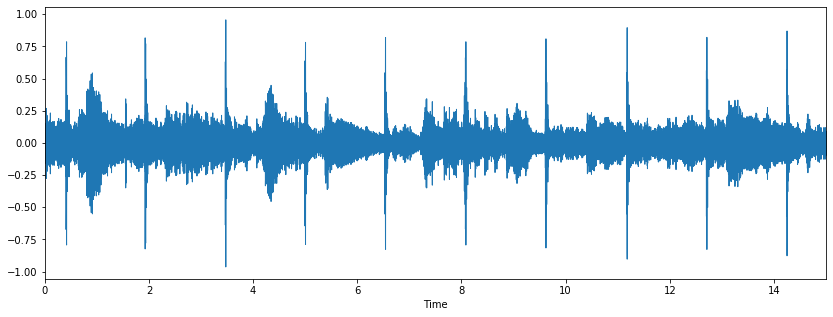

In [6]:
#We can plot the amplitude envelope of the waveform:

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

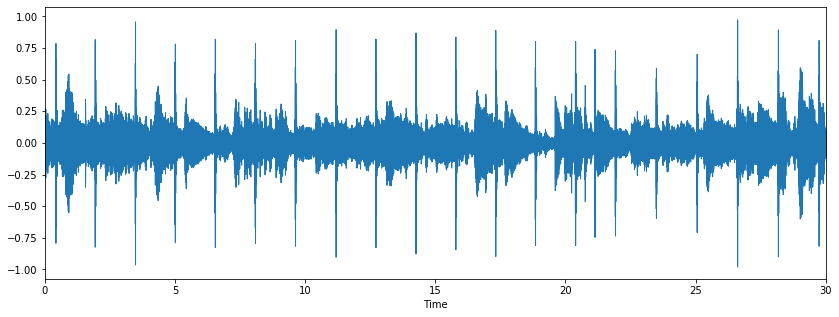

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x1, sr=sr1)

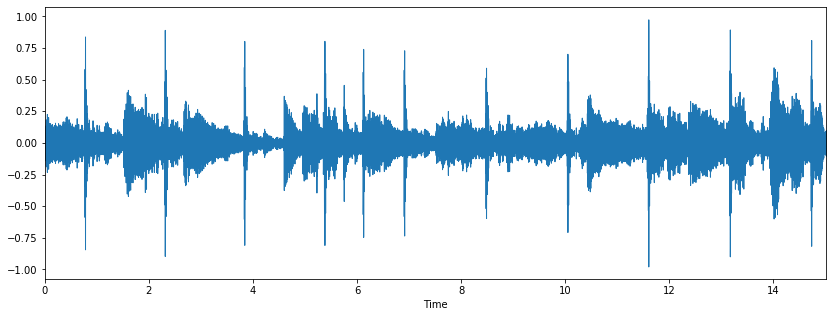

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr=sr2)

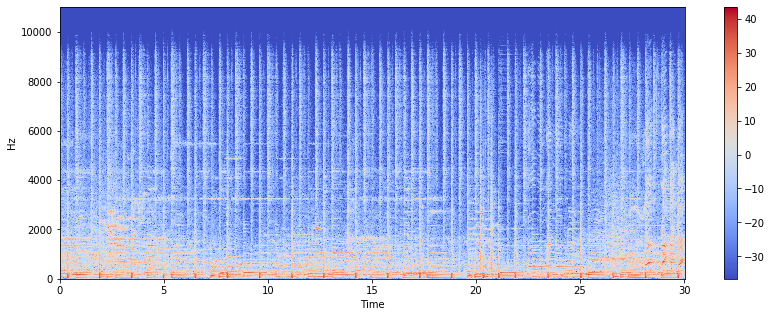

In [27]:
#Spectrogram:

X = librosa.stft(x) #calculates Short-time Fourier Transform to compute Spectrogram
Xdb = librosa.amplitude_to_db(abs(X)) #Convert an amplitude spectrogram to dB-scaled spectrogram

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

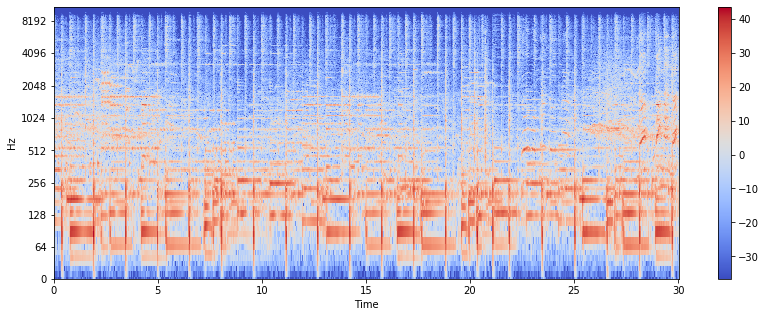

In [28]:
#Since most values are located in lower frequencies, we can convert the Hz scale to a logarithm one:

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Now onto features

**1. Zero crossing rate:** rate of sign-changes along a signal (the rate at which the signal changes from positive to negative or back).

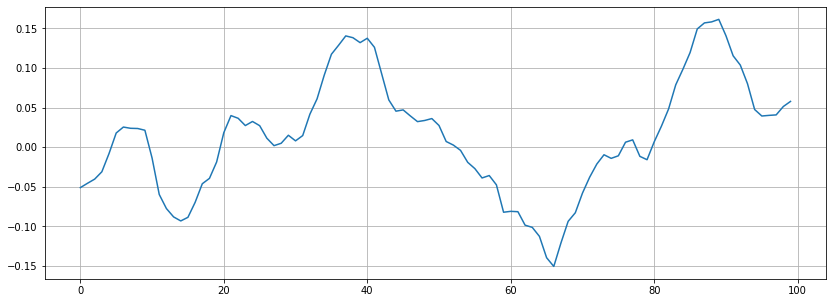

In [29]:
#To plot this we will "zoom in" our waveplot:
n0 = 2300
n1 = 2400
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()



In [31]:
#We can see the signal crosses the X axis 7 times. Therefore, the zero_crossings rate for this "zoomed in"
#signal should also be 7.
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

7


**2. Spectral centroid:** indicates where the center of mass of the spectrum is located.

In [41]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1293,)

In [43]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
t.shape

(1293,)

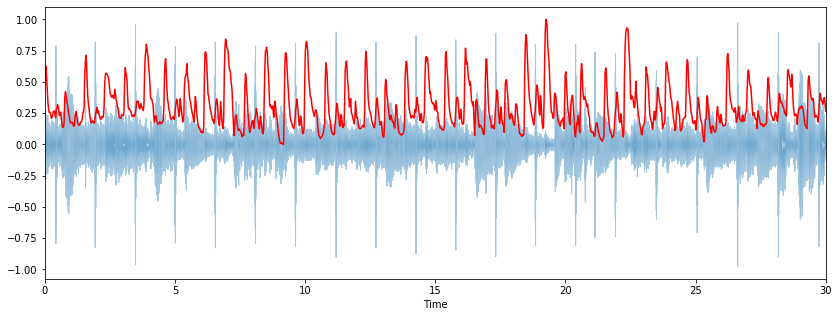

In [48]:
from sklearn.preprocessing import minmax_scale
# Normalising the spectral centroid for visualisation
n_central_spectroids=minmax_scale(spectral_centroids, axis=0)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, n_central_spectroids, color='r')

**3. Spectral rolloff:** measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy lies.

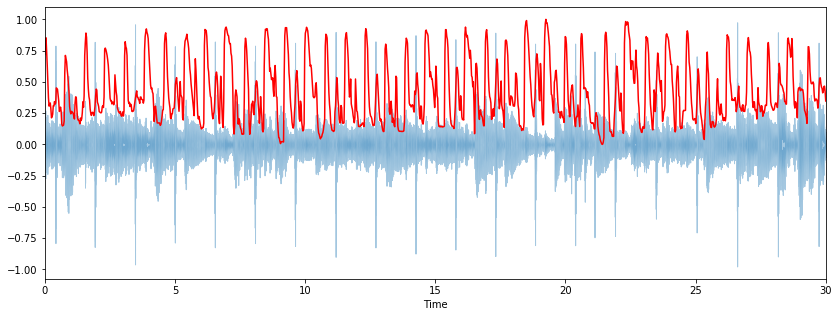

In [49]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
n_spectral_rolloff=minmax_scale(spectral_rolloff, axis=0)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, n_spectral_rolloff, color='r')

**4. Mel-Frequency Cepstral Coefficients:** small set of features which concisely describe the overall shape of a spectral envelope.

In [52]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print (mfccs.shape)

(20, 1293)


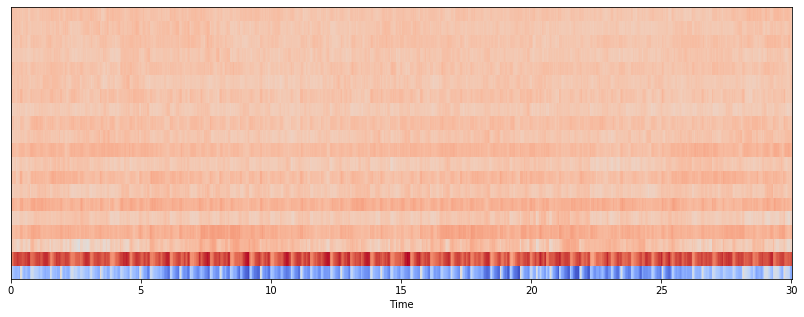

In [53]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

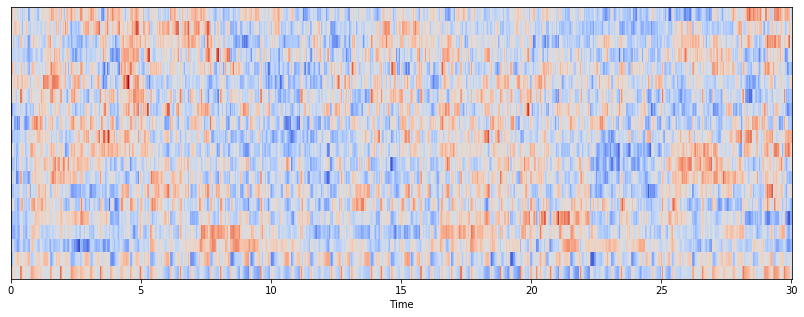

In [55]:
#Scaling:
from sklearn.preprocessing import scale
mfccs = scale(mfccs, axis=1)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**5. Chroma frequencies:** representation in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones of the musical octave.

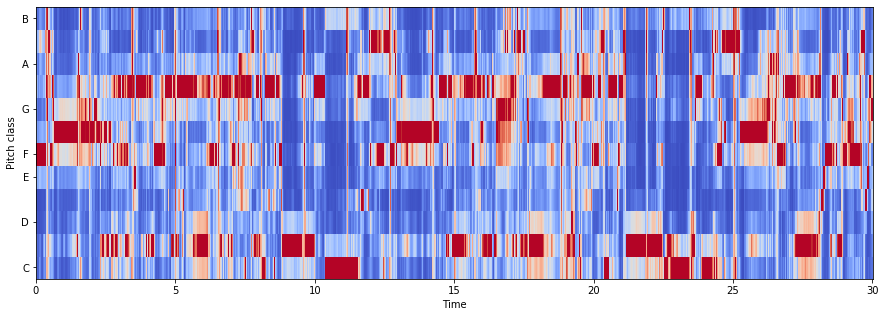

In [56]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

**6. Spectral contrast:**  

In [58]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr, hop_length=hop_length)
spectral_contrast.shape

(7, 1293)

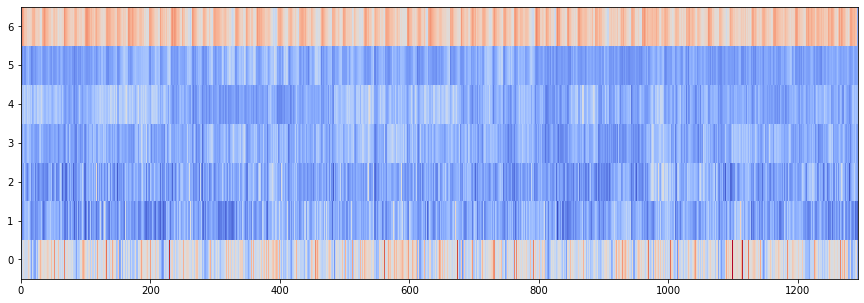

In [60]:
plt.figure(figsize=(15, 5))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='coolwarm')

In [11]:
prueba='SampleAudio_0.4mb.mp3'

In [12]:
x , sr = librosa.load(prueba)

In [14]:
ipd.Audio(prueba)

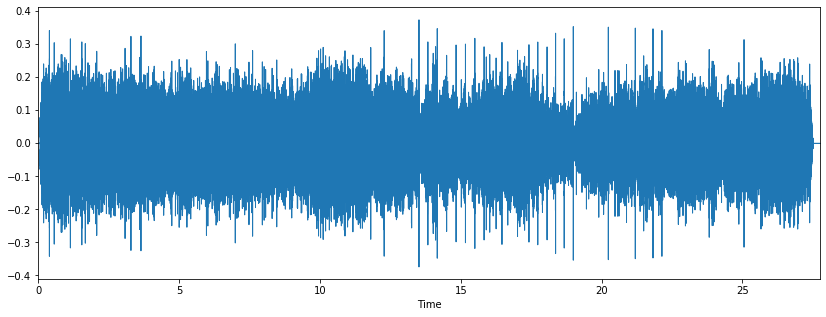

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

(611712,)